<a href="https://colab.research.google.com/github/joserlandero/Aprendizaje-Automatico/blob/main/Tarea6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Recargamos la base de datos del cafe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.cluster import DBSCAN
df = pd.read_csv('/content/kc_house_data.csv')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# **Nueva base de datos**

Decidí utilizar una base de datos relacionada al costo de la viviendas. Para mi es un tema muy interesante y delicado ya que con el tiempo, el precio de las casas ha estado aumentando ocasionando que sea menos accesible el comprar una casa para nuevas generaciones.

El crear un modelo predictivo de *regresión* permitira tener una claridad del costo de las casas y poder encontrar buenas oportunidades costo/beneficio.

# Regresión Lineal
La regresión lineal es un modelo supervisado que busca encontrar una relación matemática entre una variable dependiente ***y*** y una o más variables independientes ***x***

Se ajusta minimizando el error cuadrático medio (MSE) entre los valores reales y los predichos.
Conviene usarla porque es simple, interpretable y eficiente para entender relaciones lineales y cuantificar la influencia de las variables, siendo una buena base para problemas de predicción numérica.



## Metricas de error

Para los modelos de regresión existen distintas métricas que permiten medir la eficiencia del modelo contra datos que ya ocurrieron. Algunos ejemplos son:

- **MSE** $$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

    Función: mide el promedio de los errores al cuadrado. Penaliza más los errores grandes y es útil para evaluar la precisión general del modelo.

- **RMSE** $$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$
    Función: es la raíz cuadrada del MSE, lo que la deja en las mismas unidades que la variable objetivo. Indica cuánto se desvía, en promedio, la predicción respecto al valor real.

- **MAE** $$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$
    Función: mide el promedio de las diferencias absolutas entre valores reales y predichos. Es más robusta ante valores atípicos que el MSE.

- **froR Cuadrada** $$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$
    Función: indica el porcentaje de la variabilidad de los datos que explica el modelo (0 a 1).


## Revision de la base

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
print(df.isnull().sum())

# no hay nulos

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


### Correlación

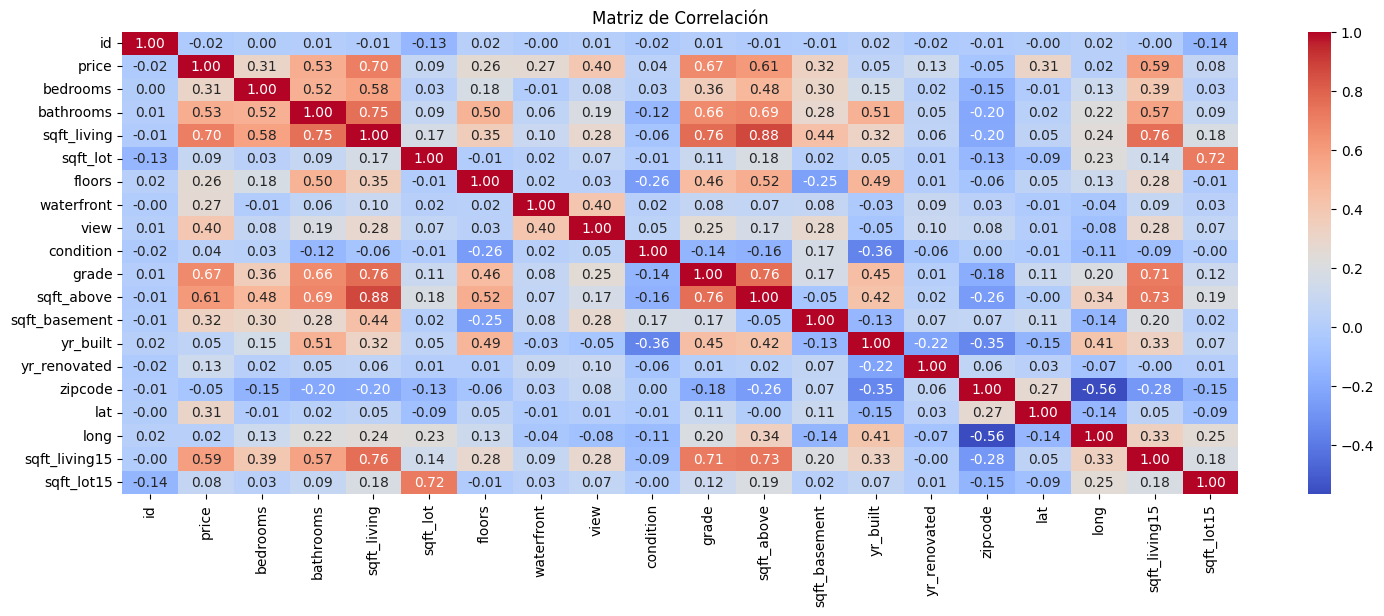

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.corr()['price'].sort_values()

corr = df_numeric.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(18,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

## Regresión Lineal

In [ ]:
# Separamos los datos
X =["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view",
           "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[X]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

RMSE: 223336.0670804113
MAE: 137809.67712295323
R2: 0.6544974911601662


In [ ]:
# Que pasa si estandarizamos los datos

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

print("Se observa poca diferencia en los resultados")


RMSE: 226222.50493466953
MAE: 137753.15023478083
R2: 0.6614781405487572
Se observa poca diferencia en los resultados


## Lasso

In [ ]:
# Que pasa si estandarizamos los datos



# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo
model = Lasso(alpha=0.3)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

print("Se observa poca diferencia en los resultados")


RMSE: 226222.66906596057
MAE: 137753.09358843218
R2: 0.661477649332819
Se observa poca diferencia en los resultados


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.248e+13, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


## Regresión Polinómica

In [ ]:
# Que pasa si estandarizamos los datos

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Crear variables polinómicas (por ejemplo, grado 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Ajustar modelo
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predicciones
y_pred = model.predict(X_test_poly)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

print("Se observa poca diferencia en los resultados")


RMSE: 217418.5102639289
MAE: 107088.20825511625
R2: 0.6873142172514589
Se observa poca diferencia en los resultados


## Random Forest

In [ ]:
# Separamos los datos
X =["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view",
           "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[X]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Crear y entrenar modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

print('Vemos una mejora signficativa en los resultados')

RMSE: 175812.77194662293
MAE: 92016.20775777004
R2: 0.785891297395431
Vemos una mejora signficativa en los resultados
